In [1]:
import pandas as pd 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [9]:
data = pd.read_csv('Dataset/BERT.csv')
data.head()

,created_at,full_text,sentiment
0,2023-09-24 03:59:53+00:00,"['gue', 'kasian', 'kuping', 'mbak', 'translato...",2
1,2023-09-24 03:53:01+00:00,"['kerjaan', 'enak', 'deket', 'suami', 'amp', '...",2
2,2023-09-24 03:32:30+00:00,"['umr', 'plus', 'bonus', 'asuransi', 'kesehatan']",0
3,2023-09-24 01:30:32+00:00,"['bacakan', 'tanda', 'bintang', 'syarat', 'ket...",1
4,2023-09-23 17:39:04+00:00,"['buatin', 'akun', 'dana', 'pensiun', 'orang',...",2


In [10]:
data.drop(['created_at'], axis=1, inplace=True)

In [11]:
data.head()

,full_text,sentiment
0,"['gue', 'kasian', 'kuping', 'mbak', 'translato...",2
1,"['kerjaan', 'enak', 'deket', 'suami', 'amp', '...",2
2,"['umr', 'plus', 'bonus', 'asuransi', 'kesehatan']",0
3,"['bacakan', 'tanda', 'bintang', 'syarat', 'ket...",1
4,"['buatin', 'akun', 'dana', 'pensiun', 'orang',...",2


In [12]:
data['sentiment'].value_counts()

sentiment
2    2665
1    1182
0     412
4     394
Name: count, dtype: int64

In [13]:
# mapping label data 0 - 2 = negative, 3 - 4 = positive
data['sentiment'] = data['sentiment'].map({0:0, 1:0, 2:1, 3:1, 4:1})

<Axes: xlabel='sentiment'>

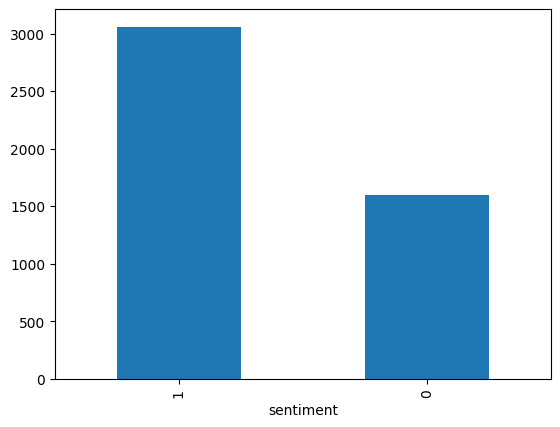

In [14]:
data['sentiment'].value_counts().plot(kind='bar')

In [15]:
# multi class classification dengan one vs rest classifier model svm
X = data['full_text']
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# menentukan c dan gamma terbaik untuk model svm dengan data teks 
# menggunakan grid search
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer


In [17]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', OneVsRestClassifier(SVC())),
])

In [18]:
parameters = {
    'tfidf__max_df': [0.25, 0.5, 0.75],
    'tfidf__ngram_range': [(1,1), (1,2), (1,3)],
    'clf__estimator__C': [1, 10, 100],
    'clf__estimator__gamma': [0.1, 0.01, 0.001],
}


In [19]:
grid_search_tune = GridSearchCV(pipeline, parameters, cv=2, n_jobs=2, verbose=3)
grid_search_tune.fit(X_train, y_train)

Fitting 2 folds for each of 81 candidates, totalling 162 fits


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('tfidf',
                                        TfidfVectorizer(stop_words='english')),
                                       ('clf',
                                        OneVsRestClassifier(estimator=SVC()))]),
             n_jobs=2,
             param_grid={'clf__estimator__C': [1, 10, 100],
                         'clf__estimator__gamma': [0.1, 0.01, 0.001],
                         'tfidf__max_df': [0.25, 0.5, 0.75],
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             verbose=3)

In [20]:
print("Best parameters set:")
print(grid_search_tune.best_estimator_.steps)

Best parameters set:
[('tfidf', TfidfVectorizer(max_df=0.25, ngram_range=(1, 3), stop_words='english')), ('clf', OneVsRestClassifier(estimator=SVC(C=100, gamma=0.1)))]


In [21]:
# menampilkan hasil grid search
print("Best score: %0.3f" % grid_search_tune.best_score_)
print("Best parameters set:")
best_parameters = grid_search_tune.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.752
Best parameters set:
	clf__estimator__C: 100
	clf__estimator__gamma: 0.1
	tfidf__max_df: 0.25
	tfidf__ngram_range: (1, 3)


In [22]:
# menampilkan hasil prediksi
predictions = grid_search_tune.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7776584317937701


In [23]:
# tfidf vectorizer bahasa indonesia
from sklearn.feature_extraction.text import TfidfVectorizer
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re
from nltk.corpus import stopwords

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemmer_tokenizer(str_input):
    words = re.sub(r"[^A-Za-z0-9\-]", " ", str_input).lower().split()
    words = [stemmer.stem(word) for word in words]
    return words

tfidf = TfidfVectorizer(tokenizer=stemmer_tokenizer, stop_words=stopwords.words('indonesian'), ngram_range=(1,3), max_df=0.25)

In [38]:
# pipeline untuk model svm dengan tfidf vectorizer bahasa indonesia
pipeline_SVM = Pipeline([
    ('tfidf', tfidf),
    ('clf', OneVsRestClassifier(SVC(C=100, gamma=0.1))),
])

In [39]:
# melatih model
pipeline_SVM.fit(X_train, y_train)

c:\Users\Farhan\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.25, ngram_range=(1, 3),
                                 stop_words=['ada', 'adalah', 'adanya',
                                             'adapun', 'agak', 'agaknya',
                                             'agar', 'akan', 'akankah', 'akhir',
                                             'akhiri', 'akhirnya', 'aku',
                                             'akulah', 'amat', 'amatlah',
                                             'anda', 'andalah', 'antar',
                                             'antara', 'antaranya', 'apa',
                                             'apaan', 'apabila', 'apakah',
                                             'apalagi', 'apatah', 'artinya',
                                             'asal', 'asalkan', ...],
                                 tokenizer=<function stemmer_tokenizer at 0x000001D418BEBE20>)),
                ('clf', OneVsRestClassifier(estimator=SVC(C=100, gamma=0.1)))])

In [40]:
# menampilkan hasil prediksi
predictions_SVM = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7454350161117078


In [41]:
# model random forest
from sklearn.ensemble import RandomForestClassifier

pipeline_RF = Pipeline([
    ('tfidf', tfidf),
    ('clf', RandomForestClassifier()),
])

In [42]:
# melatih model
pipeline_RF.fit(X_train, y_train)

c:\Users\Farhan\miniconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.25, ngram_range=(1, 3),
                                 stop_words=['ada', 'adalah', 'adanya',
                                             'adapun', 'agak', 'agaknya',
                                             'agar', 'akan', 'akankah', 'akhir',
                                             'akhiri', 'akhirnya', 'aku',
                                             'akulah', 'amat', 'amatlah',
                                             'anda', 'andalah', 'antar',
                                             'antara', 'antaranya', 'apa',
                                             'apaan', 'apabila', 'apakah',
                                             'apalagi', 'apatah', 'artinya',
                                             'asal', 'asalkan', ...],
                                 tokenizer=<function stemmer_tokenizer at 0x000001D418BEBE20>)),
                ('clf', RandomForestClassifier())])

In [43]:
# menampilkan hasil prediksi
predictions_RF = pipeline_RF.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))

Accuracy: 0.7454350161117078


In [44]:
# visualisasi akurasi dari model svm dan random forest
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

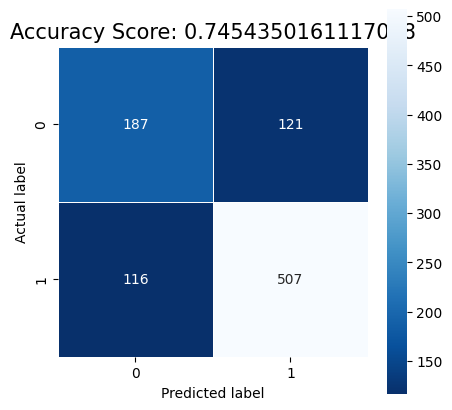

In [46]:
# visualisasi confusion matrix dari model svm
cm = confusion_matrix(y_test, predictions_SVM)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_SVM))
plt.title(all_sample_title, size = 15)
plt.show()

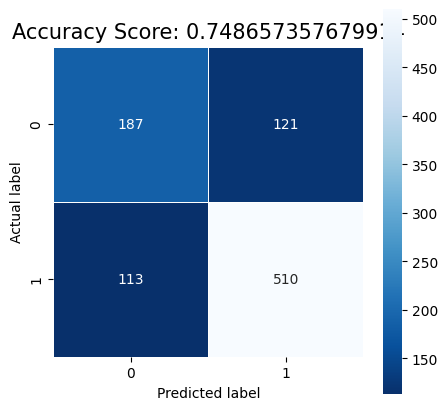

In [47]:
# visualisasi confusion matrix dari model random forest
cm = confusion_matrix(y_test, predictions_RF)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(accuracy_score(y_test, predictions_RF))
plt.title(all_sample_title, size = 15)
plt.show()

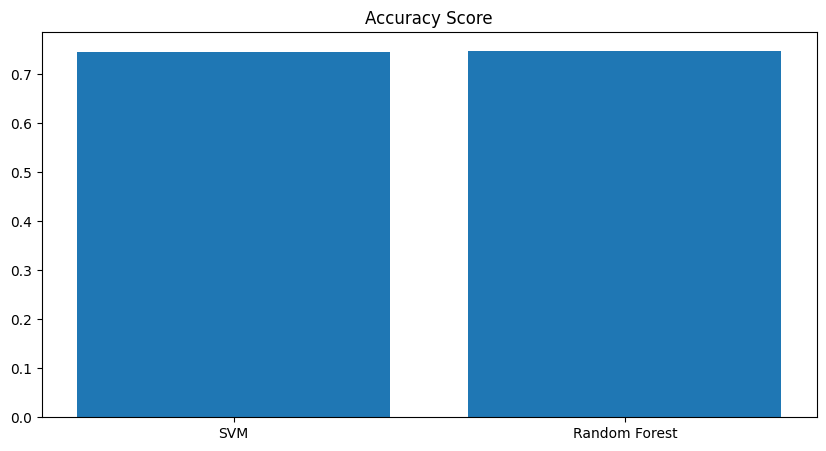

In [50]:
plt.figure(figsize=(10,5))
plt.bar(['SVM', 'Random Forest'], [accuracy_score(y_test, predictions_SVM), accuracy_score(y_test, predictions_RF)])
plt.title('Accuracy Score')
plt.show()